# Samantha Bracellari 
## CSI 5810 Assignment 2

### Problems 1 & 2 - Stopword Processing, Jaccard, and Cosine Similarities

In [1]:
# import necessary libs
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cosine

# read all files into an array
url = '/home/samantha/school/csi-5810/hw/hw2/txtfiles/'

files = [ # replace newline characters with spaces
    open(url + 'lyrics1.txt', 'r').read().replace('\\n', ' '), 
    open(url + 'lyrics2.txt', 'r').read().replace('\\n', ' '),
    open(url + 'lyrics3.txt', 'r').read().replace('\\n', ' '),
    open(url + 'lyrics4.txt', 'r').read().replace('\\n', ' '),
    open(url + 'rhym1.txt', 'r').read().replace('\\n', ' '),
    open(url + 'rhym2.txt', 'r').read().replace('\\n', ' '),
    open(url + 'rhym3.txt', 'r').read().replace('\\n', ' '),
    open(url + 'rhym4.txt', 'r').read().replace('\\n', ' ')
]

In [2]:
filtered_files = [] # this will hold the files after stopword filtering

# filter out all stopwords in each file, append files to new array
for file in files:
    text = word_tokenize(file)
    text = [w.lower() for w in text]
    filtered_text = [word for word in text if not word in stopwords.words()]
    sentence = ' '.join(filtered_text)
    filtered_files.append(sentence)

vector = CountVectorizer()
data = vector.fit_transform(filtered_files).toarray()
data = np.where(data > 0, 1, 0) # change any value greater than 0 to be a 1
df = pd.DataFrame(data) # convert into dataframe

In [3]:
j_scores = [] # this will hold all jaccard similarity scores
c_scores = [] # this will hold all cosine similarity scores

# compute jaccard & cosine similarity of every document pair 
for i in range(0, 8):
    for j in range(0, 8):
        jac = jaccard_score(df.iloc[i], df.iloc[j]) # compute jaccard similarity
        j_scores.append(jac)
        cos = 1 - cosine(df.iloc[i], df.iloc[j]) # compute cosine similarity
        c_scores.append(cos)

j_scores, c_scores = np.array(j_scores), np.array(c_scores)
j_scores, c_scores = j_scores.reshape(8, 8), c_scores.reshape(8, 8) # reshape into 8x8 matrix
j_df, c_df = pd.DataFrame(j_scores), pd.DataFrame(c_scores)

In [4]:
print('Jaccard Similarity Scores\n')
print(j_df.to_markdown())

Jaccard Similarity Scores

|    |         0 |         1 |         2 |         3 |         4 |         5 |         6 |        7 |
|---:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|
|  0 | 1         | 0.0175439 | 0         | 0.0243902 | 0.027027  | 0         | 0.0540541 | 0        |
|  1 | 0.0175439 | 1         | 0         | 0.0243902 | 0.027027  | 0         | 0.0263158 | 0        |
|  2 | 0         | 0         | 1         | 0.0454545 | 0         | 0         | 0         | 0        |
|  3 | 0.0243902 | 0.0243902 | 0.0454545 | 1         | 0         | 0         | 0         | 0        |
|  4 | 0.027027  | 0.027027  | 0         | 0         | 1         | 0.0588235 | 0.0555556 | 0        |
|  5 | 0         | 0         | 0         | 0         | 0.0588235 | 1         | 0         | 0        |
|  6 | 0.0540541 | 0.0263158 | 0         | 0         | 0.0555556 | 0         | 1         | 0.047619 |
|  7 | 0         | 0         | 0         | 0         | 

In [6]:
print('Cosine Similarity Scores\n')
print(c_df.to_markdown())

Cosine Similarity Scores

|    |         0 |         1 |         2 |         3 |         4 |        5 |         6 |         7 |
|---:|----------:|----------:|----------:|----------:|----------:|---------:|----------:|----------:|
|  0 | 1         | 0.0344828 | 0         | 0.0515026 | 0.0618984 | 0        | 0.117444  | 0         |
|  1 | 0.0344828 | 1         | 0         | 0.0515026 | 0.0618984 | 0        | 0.058722  | 0         |
|  2 | 0         | 0         | 1         | 0.0877058 | 0         | 0        | 0         | 0         |
|  3 | 0.0515026 | 0.0515026 | 0.0877058 | 1         | 0         | 0        | 0         | 0         |
|  4 | 0.0618984 | 0.0618984 | 0         | 0         | 1         | 0.111111 | 0.105409  | 0         |
|  5 | 0         | 0         | 0         | 0         | 0.111111  | 1        | 0         | 0         |
|  6 | 0.117444  | 0.058722  | 0         | 0         | 0.105409  | 0        | 1         | 0.0912871 |
|  7 | 0         | 0         | 0         | 0         | 0

-----

### Problem 3 - 1-NN Boundaries

In [7]:
# import necessary libs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[1, 0], [0, 1], [0, -1], [0, 0], [0, 2], [0, -2], [-2, 0]]) # sample data
y = np.array([1, 1, 1, 2, 2, 2, 2]) # corresponding class

# create color maps
cmap_light = ListedColormap(['#74DBD4', '#AAAAFF'])
cmap_bold = ListedColormap(['#1F736D', '#0000FF'])

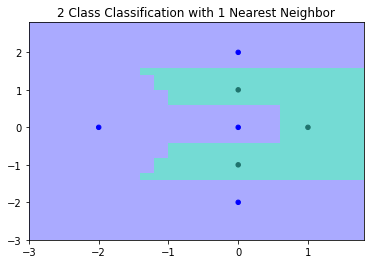

In [9]:
# use the K Nearest Neighbors classifier and fit it to the data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# calculate mins and maxes of the data, needed for meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])   
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('2 Class Classification with 1 Nearest Neighbor')
plt.show()

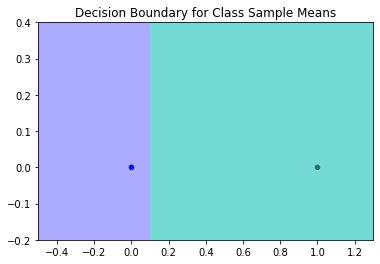

In [10]:
# calculate sample mean of each feature of each class
mean_1, mean_2 = np.mean(X[0:3], axis=0), np.mean(X[3:7], axis=0)

means = np.array([mean_1, mean_2]) # sample data
y2 = np.array([1, 2]) # corresponding class

# use the K Nearest Neighbors classifier and fit it to the data
knn = KNeighborsClassifier(1)
knn.fit(means, y2)

# calculate mins and maxes of the data, needed for meshgrid
x_min, x_max = means[:, 0].min(), means[:, 0].max() + 1
y_min, y_max = means[:, 1].min() - 0.2, means[:, 1].max() + 0.4

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])   
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundary for Class Sample Means')
plt.show()

-----

### Problem 4 - k-NN and Naive Bayes

In [11]:
# import necessary libs
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# read in test and train data, assign vars
train = pd.read_csv('/home/samantha/school/csi-5810/hw/hw2/wheat-data.csv')
test = pd.read_csv('/home/samantha/school/csi-5810/hw/hw2/wheat-data-test.csv')

X_train, X_test = train.iloc[:, : 7], test.iloc[:, : 7]
y_train = train['Class']

In [12]:
# perform KNN predictions for 1, 3, and 5 neighbors
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_test)

print('KNN Predictions:\n\tk=1:', y_pred1, '\n\tk=3:', y_pred3, '\n\tk=5:', y_pred5)

KNN Predictions:
	k=1: [3 2 3] 
	k=3: [3 2 3] 
	k=5: [3 2 3]


In [13]:
# perform Naive Bayes prediction
gnb = GaussianNB()
y = gnb.fit(X_train, y_train).predict(X_test)
print('\nNaive Bayes Prediction:', y)


Naive Bayes Prediction: [3 2 3]


#### Discussion

As you can see, the class predictions for 1, 3, and 5 neighbors all result in the same thing: class 3 for the first test sample, class 2 for the second test sample, and class 3 again for the third test sample. Using the Naive Bayes classifier provides the same results.